<img src="./img/Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 6

### Juan Manuel Ronchetti

## Ejercicio Integrador Teoria Moderna de Filtrado

Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:
<img src="./img/Plantilla_PB.png" width=650/>

Se pide:

a) Determine la expresion H(s) del filtro pasa-altos normalizado

b) Realizar el diagrama de polos y ceros de H(s)

c) Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:
<img src="./img/CircuitoPropuesto.png" width=650/>

d) Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:
<img src="./img/Schaumann.png" width=650/>

## Diseño

### Obtencion del pasabajos

El ejercicio propuesto pide diseñar un pasa-altos a partir del prototipo pasabajos brindado, con una frecuencia de corte de 300 Hz y un cero de transmision en 100 Hz. La obtencion de la transferencia pasabajos se realizo mediante analisis y deduccion, como se detallará a continuacion.

Se pide que el filtro presente maxima planicidad en la banda de paso, pero no se pide una restriccion especifica para el $\alpha_{Max}$, y resulta dificil determinarla por observacion del grafico de modulo brindado, por ende para obtener el pasabajos pedido se utilizará una transferencia tipo Butterworth, con $\epsilon = 1$ y una atenuacion de 3 dB en la frecuencia de corte.

Para determinar el orden del pasabajos Butterworth, se observa que en el diagrama de modulo proporcionado existe una pendiente negativa de -20 db/decada luego del cero de transmision. Si se analiza el caso de un filtro pasabajos Notch, se observa que para un filtro de orden 2 no existiria esta pendiente:
<img src="./img/Notch.png" width=650 />

Para cumplir con la plantilla solicitada, dado que en el numerador se tendrá un polinomio de orden 2 para fijar el cero de transmision, será necesario un Butterworth de orden 3 para poder obtener la pendiente deseada:
\begin{equation} T_{Butter 3}(s) = \frac{1}{s+1} \cdot \frac{ 1 }{s^2 + s + 1} \end{equation}

Se pide un cero de transmision en 100 Hz, el cual en la plantilla pasabajos corresponde a 300 Hz, o en 3 estando ya normalizado:

Pasa-altos:
* $f_0 = 1 \Rightarrow f_z = 0.33$

Pasabajos:
* $f_0 = 1 \Rightarrow f_z = 3$

De la transferencia pasabajos Notch presentada anteriormente, se observa que si se designara como numerador de la transferencia simplemente ($s^2 + 3^2$) apareceria una ganancia de $3^2$ en la banda de paso; por lo que ésta debe ser atenuada en un factor de $\frac{1}{3^2}$

Finalmente, teniendo todas estas consideraciones, se diseño la siguiente transferencia pasabajos:

\begin{equation} H_{LP}(s) = \frac{1}{s+1} \cdot \frac{ \frac{1}{3^2} \cdot (s^2 + 9) }{s^2 + s + 1} \end{equation}

A continuacion se verifica la transferencia obtenida mediante simulacion numerica en Python:

<IPython.core.display.Math object>

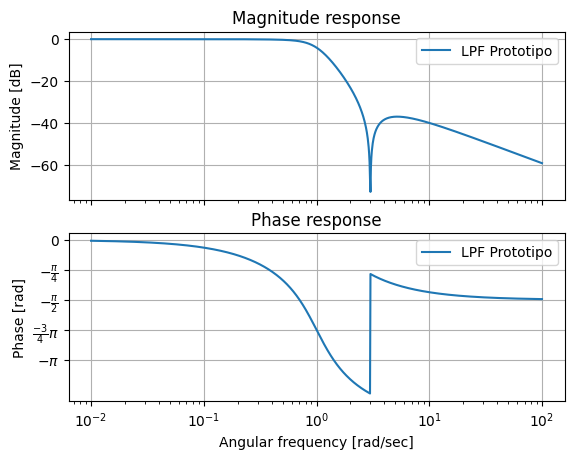

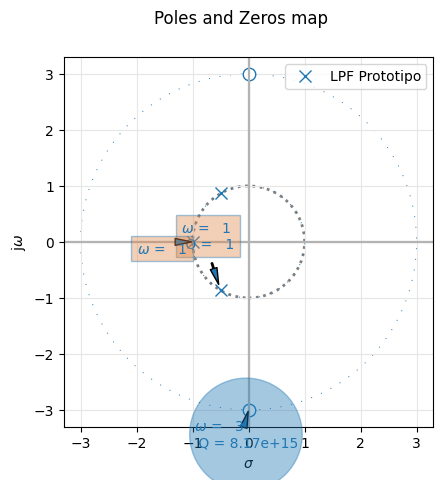

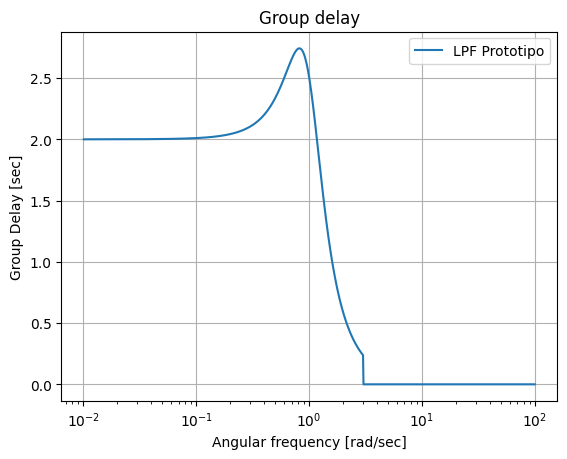

In [2]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_SOS, pretty_print_lti

num=[1/9, 0, 1]
den= np.polymul([1, 1], [1, 1, 1])

tf = sig.TransferFunction(num, den)

pretty_print_lti(tf)
analyze_sys( tf, 'LPF Prototipo' )

Se observa que la respuesta es la misma que la de la plantilla pasabajos solicitada, por lo tanto se procede a realizar la transformacion pasa-altos.

### Obtencion del pasa-altos

La transformacion pasa-altos se realiza reemplazando $s$ por $\frac{1}{s}$ como se detalla a continuacion:
<img src="./img/Pasaaltos.png" width=650/>

La transferencia resulta:
\begin{equation} H_{HP}(s) = \frac{s}{s+1} \cdot \frac{ (s^2 + \frac{1}{3^2}) }{s^2 + s + 1} \end{equation}


### Simulacion numerica - Diagrama de polos y ceros

A continuacion se verifican los resultados con la simulacion numerica, donde tambien se observa el diagrama de polos y ceros:

<IPython.core.display.Math object>

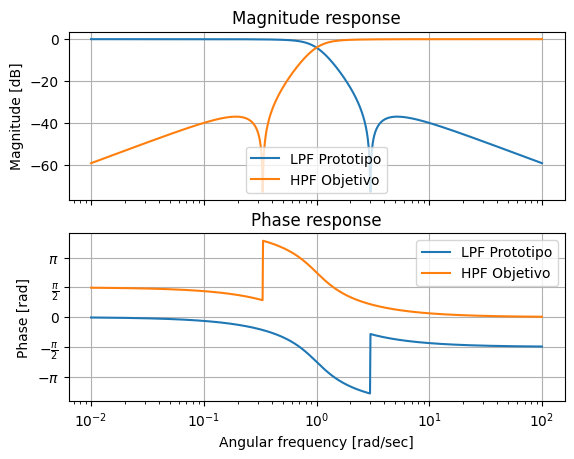

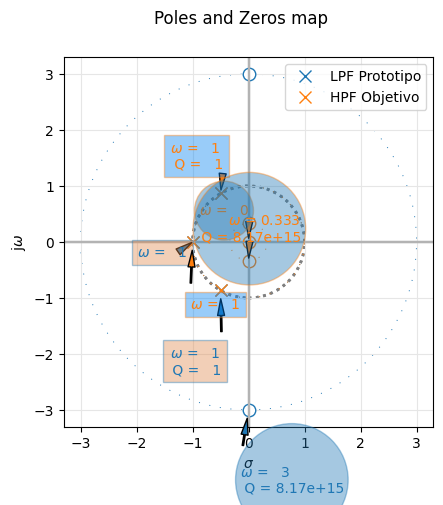

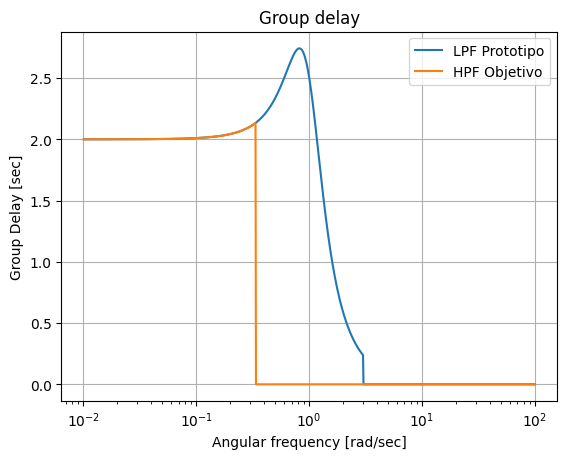

In [13]:
# Pasabajos para verlos lado a lado
num=[1/9, 0, 1]
den= np.polymul([1, 1], [1, 1, 1])
tf = sig.TransferFunction(num, den)
analyze_sys( tf, 'LPF Prototipo' )
#-----------------------------------

# Pasa-altos
num_hp = np.polymul([1,0],[1,0,1/9])
den_hp = np.polymul([1, 1], [1,1,1])

tf_hp = sig.TransferFunction(num_hp, den_hp)
pretty_print_lti(tf_hp)
analyze_sys(tf_hp , 'HPF Objetivo' )

Si se amplia el grafico de respuesta de modulo obtenido se observa lo siguiente:

<img src="./img/4 db.png"  /> 

Comparativa lado a lado con un pasa-altos Butterworth sin ceros de transmision:

<img src="./img/3 db.png"  /> 

### Conclusiones

* Se verifica que se obtuvo la transferencia pasa-altos buscada.
* Se observa que para $w=1$ se tiene una atenuacion de $4 dB$ en vez de la atenuacion tipica de un Butterworth de $3 dB$, fenomeno debido a haber agregado el cero de transmision y modificado la transferencia Butterworth normal.
* Se observa que el diagrama de polos y ceros del pasa-altos resulta igual al del pasabajos prototipo respecto a los polos, y respecto a los ceros, pasan de estar en $jw=3$ a $jw=1/3$, y se agrega uno en $w=0$. 

## Implementacion circuital

### Obtencion de la transferencia de la red

Para la implementacion circuital, se pide utilizar la red dada para la estructura de segundo orden. A continuacion se analiza la misma y se plantea un sistema de ecuaciones:

<img src="./img/Sintesis.png" width="650" /> 

Como se observa de la deduccion en papel, se obtuvieron 3 ecuaciones a partir de las cuales se puede determinar la transferencia.

Ante la dificultad de la realizacion de los calculos en papel, se aprovecharon las ventajas computacionales del analisis simbolico en Python, y se llegó a la transferencia mediante el siguiente codigo:

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import TransferFunction
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math, Markdown
from pytc2.sistemas_lineales import simplify_n_monic, parametrize_sos
from pytc2.general import print_subtitle

# Variables simbólicas
s = sp.symbols('s', complex=True)
Vx, Vy, Vi, Vo = sp.symbols("Vx, Vy, Vi, Vo")
G1, G2, G5, G, C = sp.symbols("G1, G2, G5, G, C")

# Sistemas de ecuaciones
aa = sp.solve([ 
                Vx*(s*C+G1+G2) - Vi*(s*C) - Vy*G2, 
                Vx*(2*G) - Vy*G - Vo*G,
                Vx*(s*C + G5) - Vi*G5 - Vo*(s*C)
                ], 
                [Vo, Vi, Vx, Vy])
T1 = aa[Vo]/aa[Vi]

num, den = sp.fraction(sp.simplify(sp.expand(T1)))
num = sp.Poly(num,s)
den = sp.Poly(den,s)
num1, den1, w_on, Q_n, w_od, Q_d, k1 = parametrize_sos(num, den)

print_subtitle('Transferencia obtenida')

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.Mul(k1,num1/den1, evaluate=False)) ))

#### Transferencia obtenida

<IPython.core.display.Math object>

### Sintesis circuital

Habiendo obtenido la transferencia del circuito propuesto, se calcularon los componentes para la respuesta buscada:

<img src="./img/Componentes.png" width=650/>

Con los valores calculados se construyó el siguiente circuito en LTSPice:

<img src="./img/Circuito.png" width=850/>

### Simulacion circuital

A continuacion se simuló el circuito construido y se obtuvo la siguiente respuesta:

<img src="./img/Sim.png" width=650/>

Se observa que se obtuvo la respuesta buscada y obtenida mediante simulacion numerica:
* Frecuencia de corte: $2\pi159mHz = 1$

Como se aclaro previamente, esta se haya en -4db debido al efecto de los ceros de transmision sobre la transferencia Butterworth.
* Cero de transmision: $2\pi53mHz = 0.33$

Se obtuvieron los resultados buscados, por lo que el diseño fue exitoso.

## Comparativa con la red propuesta por Schaumann

En su libro _Design of Analog Filters_, Rolf Schaumann propone la siguiente red para implementar transferencias bicuadraticas:

<img src="./img/Schaumann.png" width=650/>

A continuacion se analizaran las similitudes, diferencias, ventajas y desventajas de la utilizacion de esta red frente a la otra propuesta para el caso en cuestion:

Similitudes:
* Ambas utilizan una estructura basada en el GIC, tomando la salida del circuito en la salida del segundo opamp.
* Con ambas se puede obtener la transferencia buscada.
* Utilizan la misma cantidad de componentes (si se tiene en cuenta los componentes vinculados por levantamiento parcial de masas como uno solo).

Diferencias:
* El capacitor pasa de ser la Z4 a la Z2.
* Cambio de la R de entrada por un capacitor en serie.
* La de Schaumann presenta componentes vinculados mediante el levantamiento parcial de masas.

Ventajas de la red de Schaumann:
* Permite obtener no solo la transferencia buscada sino todos los tipos de filtro, cualquier estructura bicuadratica, es una red muy versatil.

Deventajas de la red de Schaumann:
* La implementacion de componentes vinculados mediante el levantamiento parcial de masas exige una mayor dificultad constructiva, y la potencial necesidad de más componentes.